In [ ]:
!pip install facenet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.3 MB/s 


In [ ]:
from facenet_pytorch import MTCNN, InceptionResnetV1, fixed_image_standardization, training
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from PIL import Image
import cv2
import time
import os
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/drive/MyDrive/test/4.jpg')
# img2 = cv2.resize(img,(160,160))
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True)

In [ ]:
faces, _ = mtcnn.detect(img)

In [ ]:
faces

array([[500.74048, 335.62686, 711.7312 , 601.6136 ],
       [ 74.03636, 197.59886, 234.59364, 417.46796],
       [332.58496, 373.39496, 490.47958, 581.4014 ],
       [309.90588,  72.56294, 444.33392, 247.16939],
       [453.42224,  49.28692, 578.5436 , 198.34126],
       [232.30597, 235.29521, 350.6727 , 386.40115]], dtype=float32)

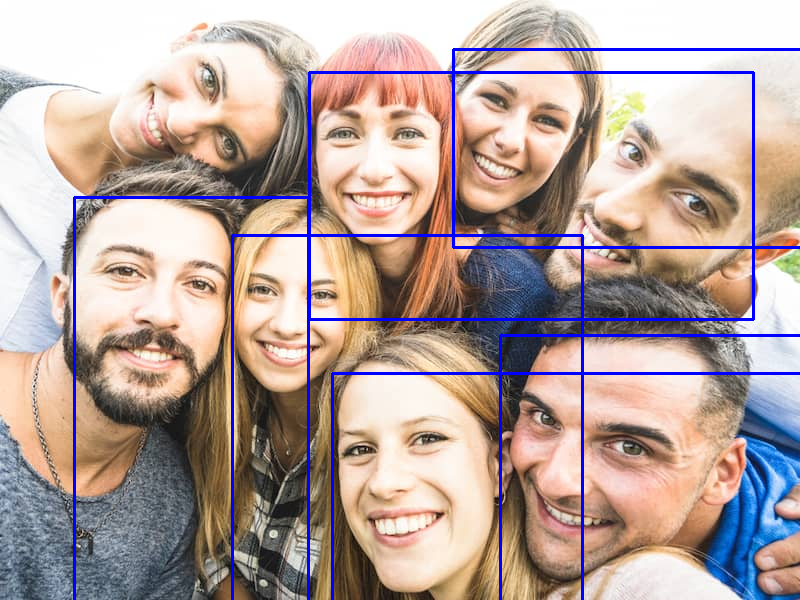

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (int(x), int(y)), (int(x)+int(w), int(y)+int(h)), (255, 0, 0), 2)

cv2_imshow(img)

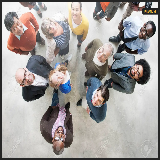

In [ ]:
cv2_imshow(img2)

In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 26.8 MB/s 


In [8]:
from mtcnn.mtcnn import MTCNN
import os
import cv2

In [3]:
def mtcnn_detect(frame):
    mtcnn = MTCNN()
    boxes = []
    detector = mtcnn.detect_faces(frame)
    for i in range(len(detector)):
        boxes.append(detector[i]['box'])
    return boxes

In [38]:
def crop_photos():
    folder = '/content/drive/MyDrive/photos'
    savefolder = '/content'
    for filename in os.listdir(folder):
        indfolder = folder + "/" + filename
        indsavefolder = savefolder + "/" + filename
        for fname in os.listdir(indfolder):
            opencv_image = cv2.imread(os.path.join(indfolder, fname))
            if opencv_image is not None:
                # tensor,box,cropped_arr = yoloface(opencv_image,isvideo=False)
                box = mtcnn_detect(opencv_image)
                # for i in range(len(box)):
                i = 0
                cropped = opencv_image[int(box[i][1]):int(
                        box[i][1])+int(box[i][3]), int(box[i][0]):int(box[i][0])+int(box[i][2])]
                cv2_imshow(cropped)
                    # cropped = cropped_arr[i]
                    # print(cropped.shape)
                    # resize to (160,160)
                    # cropped = cv2.resize(cropped, (160, 160))
                    # if not os.path.exists(indsavefolder):
                    #     os.makedirs(indsavefolder)
                    # finalpath = indsavefolder + "/" + fname + str(i) + ".jpg"
                    # cv2.imwrite(finalpath, cropped)

1/1 [==============================] - 0s 132ms/step


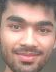

1/1 [==============================] - 0s 144ms/step


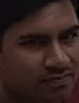

1/1 [==============================] - 0s 168ms/step


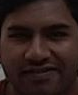

1/1 [==============================] - 0s 112ms/step


IndexError: ignored

In [39]:
crop_photos()

In [27]:
def make_rect(frame,box,name):
    x,y,w,h = box
    # cv2.rectangle(frame, (int(x), int(y) + int(h) - 35),
                                    # (int(x) + int(w), int(y) + int(h)), (0, 0, 255), cv2.FILLED)
    # font = cv2.FONT_HERSHEY_DUPLEX
    # cv2.putText(frame, name, (int(x) + 6, int(y) + int(h) - 6),
                                    # font, 1.0, (255, 255, 255), 1)

    cv2.rectangle(frame, (int(x), int(y)), (int(
                            x)+int(w), int(y)+int(h)), (255, 0, 0), 2)

In [43]:
img = '/content/drive/MyDrive/photos/nema/WIN_20220923_16_37_46_Pro.jpg'
frame = cv2.imread(img)

In [28]:
box = mtcnn_detect(frame)

In [29]:
box

[[51, 26, 56, 72]]

In [30]:
make_rect(frame,box[0],'nema')

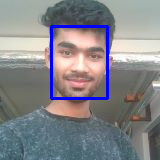

In [31]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)

In [40]:
!pip install yoloface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yoloface: filename=yoloface-0.0.4-py3-none-any.whl size=5984 sha256=7e5aaa57eb357f86d30390ee079662716750713301ff37766d60b814355aacb0
  Stored in directory: /root/.cache/pip/wheels/53/bd/2a/eb7a521c6b09e1710a7d4f712d9394b8b49ac9cbc0b2e4b5bb
Successfully built yoloface


In [47]:
from yoloface import face_analysis
import os
import numpy as np
import cv2
import torchvision.transforms as transforms
import torch

In [76]:
def yoloface(frame):
    face = face_analysis()
    transform = transforms.ToTensor()
    tensor = []
    img, box, conf = face.face_detection(
           frame_arr=frame, frame_status=True, model='full')

    if box is not None:
        try:
            for i in range(len(box)):
                cropped = frame[int(box[i][1]):int(
                        box[i][1])+int(box[i][3]), int(box[i][0]):int(box[i][0])+int(box[i][2])]
                cropped = cv2.resize(cropped, (160, 160))
                cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
                tensor.append(transform(cropped))
        except:
            pass
        box = switch_coordinates(box)
    return tensor, box

In [91]:
img = '/content/drive/MyDrive/photos/nema/WIN_20220923_16_37_46_Pro.jpg'
frame = cv2.imread(img)

In [78]:
tensor, box = yoloface(frame)

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


In [79]:
box

[[38, 26, 68, 80]]

In [80]:
frame.shape

(160, 160, 3)

In [92]:
make_rect(frame,box[0],"nema")

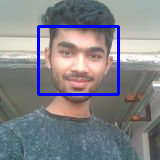

In [93]:
cv2_imshow(frame)

In [83]:
def switch_coordinates(boxes_arr):
  finallist = []
  for box in boxes_arr:
    temp = [box[0],box[1],box[3],box[2]]
    finallist.append(temp)
  return finallist

In [84]:
test = [[1,2,3,4],[5,6,7,8]]
res = switch_coordinates(test)
res

[[1, 2, 4, 3], [5, 6, 8, 7]]

In [88]:
box = switch_coordinates(box)